1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [117]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [118]:
iris = pd.read_csv('../data/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [119]:
le_variety = preprocessing.LabelEncoder()
variety_encoded = le_variety.fit_transform(iris['variety'])

In [120]:
variety_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [121]:
x = iris.iloc[:,:4]
x.shape

(150, 4)

In [122]:
y = variety_encoded
y.shape

(150,)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [124]:
model_3k = KNeighborsClassifier(n_neighbors= 3)
model_7k = KNeighborsClassifier(n_neighbors=7)

In [125]:
model_3k.fit(x_train, y_train)
model_7k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [126]:
model_7k.predict([[15.7,2.8,9.5,0.1]])

array([2])

In [127]:
model_7k.predict([[1.7,3.8,4.5,11.3]])

array([2])

In [128]:
model_7k.score(x_train, y_train) * 100

97.5

In [129]:
model_3k.predict([[15.7,2.8,9.5,0.1]])

array([2])

In [130]:
model_3k.predict([[1.7,3.8,4.5,11.3]])

array([2])

In [131]:
model_3k.score(x_train, y_train) * 100

95.0

In [132]:
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f'model k : {i} has a score of : {score}' )

model k : 1 has a score of : 1.0
model k : 2 has a score of : 1.0
model k : 3 has a score of : 1.0
model k : 4 has a score of : 1.0
model k : 5 has a score of : 1.0
model k : 6 has a score of : 1.0
model k : 7 has a score of : 0.9666666666666667
model k : 8 has a score of : 1.0
model k : 9 has a score of : 1.0
model k : 10 has a score of : 1.0
model k : 11 has a score of : 1.0
model k : 12 has a score of : 1.0
model k : 13 has a score of : 1.0
model k : 14 has a score of : 1.0
model k : 15 has a score of : 1.0
model k : 16 has a score of : 1.0
model k : 17 has a score of : 1.0
model k : 18 has a score of : 1.0
model k : 19 has a score of : 1.0
model k : 20 has a score of : 1.0


([<matplotlib.axis.XTick at 0x1b128359ac8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

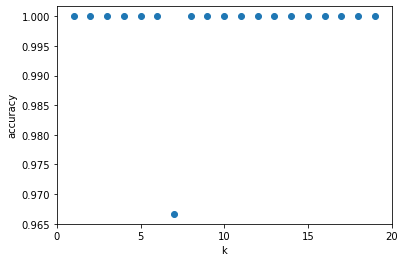

In [133]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores[k] = knn.score(x_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state=42)

In [135]:
model_3k.fit(x_train, y_train)
model_7k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [136]:
model_7k.predict([[15.7,2.8,9.5,0.1]])

array([2])

In [137]:
model_7k.predict([[1.7,3.8,4.5,11.3]])

array([2])

In [138]:
model_7k.score(x_train, y_train) * 100

93.33333333333333

In [139]:
model_3k.predict([[15.7,2.8,9.5,0.1]])

array([2])

In [140]:
model_3k.predict([[1.7,3.8,4.5,11.3]])

array([2])

In [141]:
model_3k.score(x_train, y_train) * 100

95.0

In [142]:
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test) * 100
    print(f'model k : {i} has a score of : {score}' )

model k : 1 has a score of : 97.77777777777777
model k : 2 has a score of : 94.44444444444444
model k : 3 has a score of : 95.55555555555556
model k : 4 has a score of : 94.44444444444444
model k : 5 has a score of : 94.44444444444444
model k : 6 has a score of : 95.55555555555556
model k : 7 has a score of : 96.66666666666667
model k : 8 has a score of : 95.55555555555556
model k : 9 has a score of : 94.44444444444444
model k : 10 has a score of : 95.55555555555556
model k : 11 has a score of : 96.66666666666667
model k : 12 has a score of : 96.66666666666667
model k : 13 has a score of : 97.77777777777777
model k : 14 has a score of : 95.55555555555556
model k : 15 has a score of : 95.55555555555556
model k : 16 has a score of : 95.55555555555556
model k : 17 has a score of : 94.44444444444444
model k : 18 has a score of : 95.55555555555556
model k : 19 has a score of : 96.66666666666667
model k : 20 has a score of : 94.44444444444444


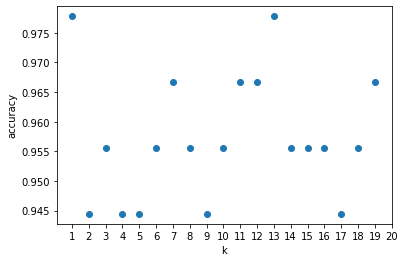

In [143]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores[k] = knn.score(x_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
ejex = list(range(1,21))
plt.xticks(ejex);

In [144]:
iris_sinsetosa = iris.drop(iris[iris['variety'] == 'Setosa'].index)

In [145]:
iris_sinsetosa

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [146]:
le_variety = preprocessing.LabelEncoder()
variety_encoded = le_variety.fit_transform(iris_sinsetosa['variety'])

In [147]:
x = iris_sinsetosa.iloc[:,:4]
x.shape

(100, 4)

In [148]:
y = variety_encoded
y.shape

(100,)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [150]:
model_3k = KNeighborsClassifier(n_neighbors= 3)
model_7k = KNeighborsClassifier(n_neighbors=7)

In [151]:
model_3k.fit(x_train, y_train)
model_7k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [152]:
model_7k.predict([[15.7,2.8,9.5,0.1]])

array([1])

In [153]:
model_7k.predict([[1.7,3.8,4.5,11.3]])

array([1])

In [154]:
model_7k.score(x_train, y_train) * 100

97.5

In [155]:
model_3k.predict([[15.7,2.8,9.5,0.1]])

array([1])

In [156]:
model_3k.predict([[1.7,3.8,4.5,11.3]])

array([1])

In [157]:
model_3k.score(x_train, y_train) * 100

97.5

In [158]:
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test) * 100
    print(f'model k : {i} has a score of : {score}' )

model k : 1 has a score of : 85.0
model k : 2 has a score of : 85.0
model k : 3 has a score of : 85.0
model k : 4 has a score of : 85.0
model k : 5 has a score of : 90.0
model k : 6 has a score of : 80.0
model k : 7 has a score of : 90.0
model k : 8 has a score of : 85.0
model k : 9 has a score of : 90.0
model k : 10 has a score of : 85.0
model k : 11 has a score of : 95.0
model k : 12 has a score of : 95.0
model k : 13 has a score of : 95.0
model k : 14 has a score of : 95.0
model k : 15 has a score of : 95.0
model k : 16 has a score of : 85.0
model k : 17 has a score of : 95.0
model k : 18 has a score of : 90.0
model k : 19 has a score of : 95.0
model k : 20 has a score of : 85.0


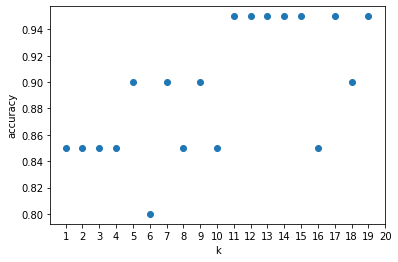

In [159]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores[k] = knn.score(x_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
ejex = list(range(1,21))
plt.xticks(ejex);

# Sin setosa con test 0.6

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.6, random_state= 42)

In [161]:
model_3k = KNeighborsClassifier(n_neighbors= 3)
model_7k = KNeighborsClassifier(n_neighbors=7)

In [162]:
model_3k.fit(x_train, y_train)
model_7k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [163]:
model_7k.predict([[15.7,2.8,9.5,0.1]])

array([1])

In [164]:
model_7k.predict([[1.7,3.8,4.5,11.3]])

array([1])

In [165]:
model_7k.score(x_train, y_train) * 100

95.0

In [166]:
model_3k.predict([[15.7,2.8,9.5,0.1]])

array([1])

In [167]:
model_3k.predict([[1.7,3.8,4.5,11.3]])

array([1])

In [168]:
model_3k.score(x_train, y_train) * 100

100.0

In [169]:
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test) * 100
    print(f'model k : {i} has a score of : {score}' )

model k : 1 has a score of : 96.66666666666667
model k : 2 has a score of : 93.33333333333333
model k : 3 has a score of : 93.33333333333333
model k : 4 has a score of : 93.33333333333333
model k : 5 has a score of : 96.66666666666667
model k : 6 has a score of : 96.66666666666667
model k : 7 has a score of : 95.0
model k : 8 has a score of : 95.0
model k : 9 has a score of : 93.33333333333333
model k : 10 has a score of : 93.33333333333333
model k : 11 has a score of : 88.33333333333333
model k : 12 has a score of : 93.33333333333333
model k : 13 has a score of : 93.33333333333333
model k : 14 has a score of : 95.0
model k : 15 has a score of : 88.33333333333333
model k : 16 has a score of : 90.0
model k : 17 has a score of : 88.33333333333333
model k : 18 has a score of : 88.33333333333333
model k : 19 has a score of : 81.66666666666667
model k : 20 has a score of : 85.0


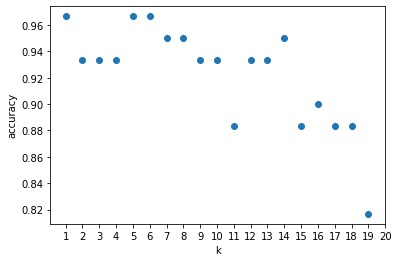

In [170]:
k_range = range(1, 20)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores[k] = knn.score(x_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
ejex = list(range(1,21))
plt.xticks(ejex);